# Import importance lib

In [1]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create sequential model

In [2]:
model = keras.Sequential()
model.add(keras.Input(shape=(9,)))

model.add(layers.Dense(64,activation="relu", name="H_layer1"))
model.add(layers.Dense(64,activation="relu", name="H_Layer2"))
model.add(layers.Dense(64,activation="relu", name="H_Layer3"))

model.add(layers.Dense(2,activation="relu", name="Output_layer"))

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ H_layer1 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ H_Layer2 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ H_Layer3 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,090 (35.51 KB)

 Trainable params: 9,090 (35.51 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer="sgd",loss='mse')

# Load train data

<ul>
<li>X_train : [[IR0, IR1, IR2, IR3, IR4, IR5, IR6 ,IR7,Smell],,,,]</li>
<li>Y_train : [[Turn ,Move],,,,]</li>
</ul>

In [5]:
#moc data
X_train = [[1,2,3,4,5,6,7,8,9],[4,3,7,5,4,8,4,3,2]]
Y_train = [[3,2],[1,6]]
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
df = pd.DataFrame(columns=['IR0','IR1','IR2','IR3','IR4','IR5','IR6','IR7','Smell'])
df.to_csv('./csv/irp_ann.csv')

# Train model

In [7]:
history = model.fit(X_train,Y_train,validation_data=(X_train,Y_train),batch_size=10,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 12.5000 - val_loss: 12.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.5000 - val_loss: 12.5000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.5000 - val_loss: 12.5000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.5000 - val_loss: 12.5000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.5000 - val_loss: 12.5000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.5000 - val_loss: 12.5000
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.5000 - val_loss: 12.5000
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.5000 - val_loss: 12.5000
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.5000 - val_loss: 12.5000
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.5000 - val_loss: 12.5000


# Model evaluate

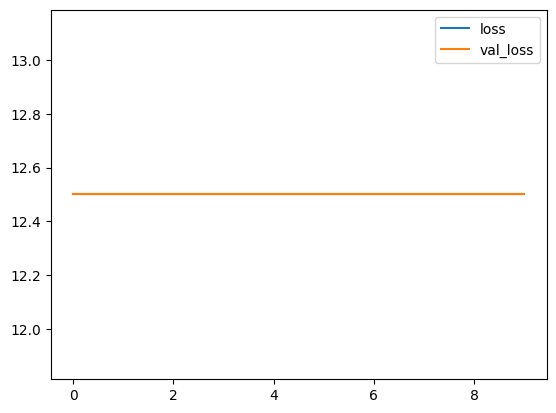

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

# Model predict

In [9]:
model.predict(np.array([[1,2,3,4,5,6,7,8,9]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0., 0.]], dtype=float32)

# Save model

In [10]:
model.save('./model/irp_ANN.keras')

# Load model and predict

In [11]:
load = keras.models.load_model('./model/irp_ANN.keras')

In [12]:
load.predict(np.array([[1,2,3,4,5,6,7,8,9]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0., 0.]], dtype=float32)